<a href="https://colab.research.google.com/github/AnishaJoy/AnishaJoy/blob/main/Run_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Spread Prediction - Colab Setup

This notebook helps you run the Wildfire Spread Prediction project on Google Colab.

## Step 0: Runtime Setup
1. Go to **Runtime** -> **Change runtime type**.
2. Select **T4 GPU** (or any available GPU) under Hardware bucket.
3. Click **Save**.

In [1]:
# Check if GPU is available
import torch
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is NOT available. Please change runtime type.")

GPU is available: Tesla T4


## Step 1: Upload Project Files
Please upload the following python files from your local project to the Colab runtime (Files tab on the left -> Upload):
- `datasets.py`
- `metrics.py`
- `models.py`
- `milesial_unet_model.py`
- `leejunhyun_unet_models.py`
- `pickle_wildfire_datasets.py` (or `pickle_full_wildfire_datasets.py`)
- `trainModel-II.py`

## Step 2: Setup Kaggle Dataset
To download the huge dataset directly to Colab, we use the Kaggle API.
1. Log in to your Kaggle account.
2. Go to **Settings** -> **API** -> **Create New Token**. This downloads `kaggle.json`.
3. Run the cell below to upload `kaggle.json`.

In [3]:
# from google.colab import files
# files.upload() # Upload your kaggle.json here

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:

# Alternative Step 2: Manual Entry (Run this IF you don't have the file)
import json
import os

# 1. Enter your Kaggle username and key below
# You can find your username on your Kaggle profile page.
# IF YOU ONLY HAVE A TOKEN/KEY: usually kaggle.json is {"username":"x","key":"y"}
# If you can't find the file, we can try to guess or you might need to try 'Create New Token' again and watch for the download pop-up.

username = input("Enter your Kaggle username: ")
key = input("Enter your Kaggle API key (the token): ")

data = {"username": username, "key": key}

# 2. This creates the file for you
!mkdir -p ~/.kaggle
with open('/content/kaggle.json', 'w') as f:
    json.dump(data, f)

!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("kaggle.json created successfully!")


Enter your Kaggle username: anisharoy04
Enter your Kaggle API key (the token): KGAT_8b5693113d22082277c666ff2dbb9218
kaggle.json created successfully!


## Step 3: Download and Extract Data

In [5]:
# Download the dataset
!kaggle datasets download -d fantineh/next-day-wildfire-spread

# Create archive directory as expected by the script
!mkdir -p archive

# Unzip into archive directory
!unzip -q next-day-wildfire-spread.zip -d archive/

Dataset URL: https://www.kaggle.com/datasets/fantineh/next-day-wildfire-spread
License(s): Attribution 4.0 International (CC BY 4.0)
100% 2.07G/2.08G [00:25<00:00, 233MB/s]
100% 2.08G/2.08G [00:25<00:00, 86.5MB/s]


## Step 4: Preprocess Data
This step converts the raw TFRecord files into pickled numpy arrays for training. This might take a while.

In [7]:
import os

# Ensure the archive directory contains what we expect
# The zip usually contains the files directly or in a folder. Let's list to be sure.
print("Archive contents:")
!ls archive | head -n 5

# Run the processing script
# Using pickle_wildfire_datasets.py as default (creates 32x32 crops)
# Use pickle_full_wildfire_datasets.py for full 64x64 data if you uploaded that instead
!python pickle_full_wildfire_datasets.py

Archive contents:
next_day_wildfire_spread_eval_00.tfrecord
next_day_wildfire_spread_eval_01.tfrecord
next_day_wildfire_spread_test_00.tfrecord
next_day_wildfire_spread_test_01.tfrecord
next_day_wildfire_spread_train_00.tfrecord
2025-12-15 14:53:30.122860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765810410.439500    9014 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765810410.522629    9014 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765810410.783809    9014 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765810410.783845    

## Step 5: Train Model
Now we can run the training script.

In [9]:
!mkdir -p savedModels

In [10]:
# Run training
!python trainModel-II.py --epochs 10 --gpus 1

initializing training on single GPU
Current GPU 0 
 RANK:  0
Using all features by default.

Selected features and their indices:
[('elevation', 0), ('pdsi', 1), ('pr', 2), ('sph', 3), ('th', 4), ('tmmn', 5), ('tmmx', 6), ('vs', 7), ('erc', 8), ('population', 9), ('NDVI', 10), ('PrevFireMask', 11)]
data size: 2944991232
label size: 245415936
crop_map size: 239664
good_indices size: 84048
total size: 3190730880
finished initializing RotatedWildfireDataset
data size: 369033216
label size: 30752768
crop_map size: 30032
good_indices size: 10720
total size: 399826736
finished initializing WildfireDataset
TRAINING ON: fa4ac4ec9382, Starting at: 2025-12-15 15:06:35.979766
Epoch [1/10], Steps [0/657], Loss: 0.5670
Epoch [1/10], Steps [20/657], Loss: 0.2071
Epoch [1/10], Steps [40/657], Loss: 0.1686
Epoch [1/10], Steps [60/657], Loss: 0.1152
Epoch [1/10], Steps [80/657], Loss: 0.1116
Epoch [1/10], Steps [100/657], Loss: 0.1616
Epoch [1/10], Steps [120/657], Loss: 0.1492
Epoch [1/10], Steps [140

Using device: cuda
Loading Test Dataset...
data size: 332070912
label size: 27672576
crop_map size: 27024
good_indices size: 8896
total size: 359779408
finished initializing WildfireDataset
Showing 5 random examples...


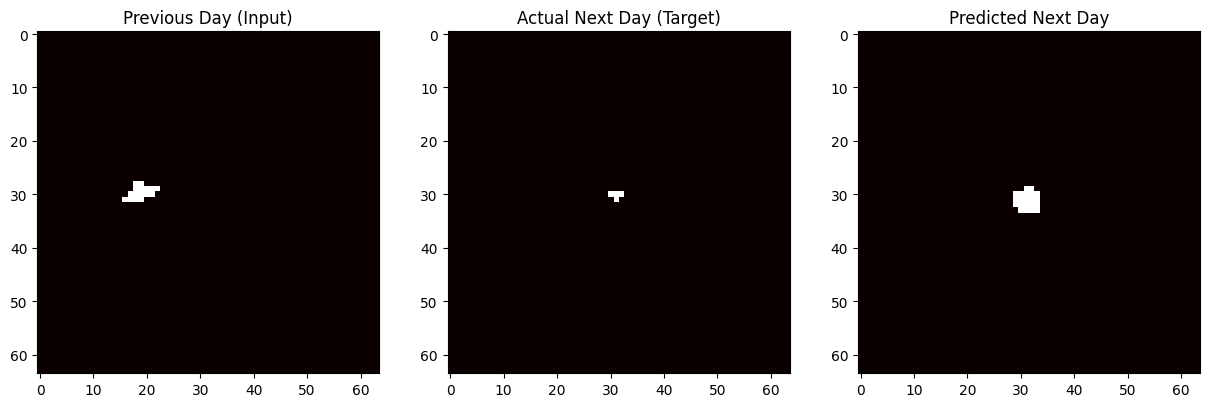

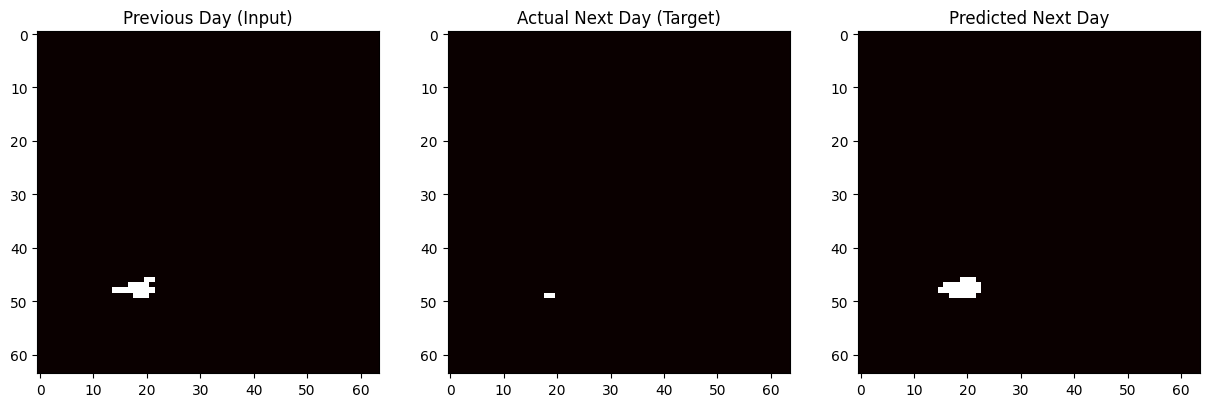

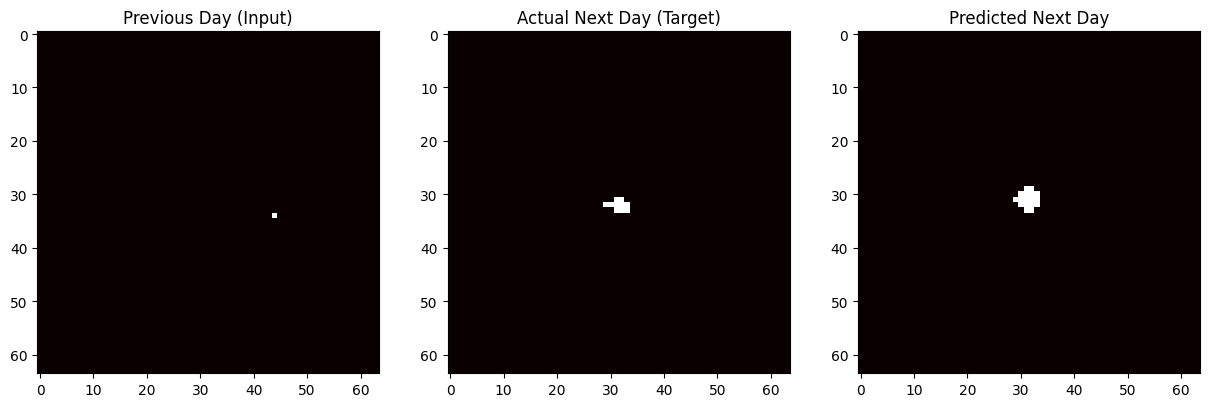

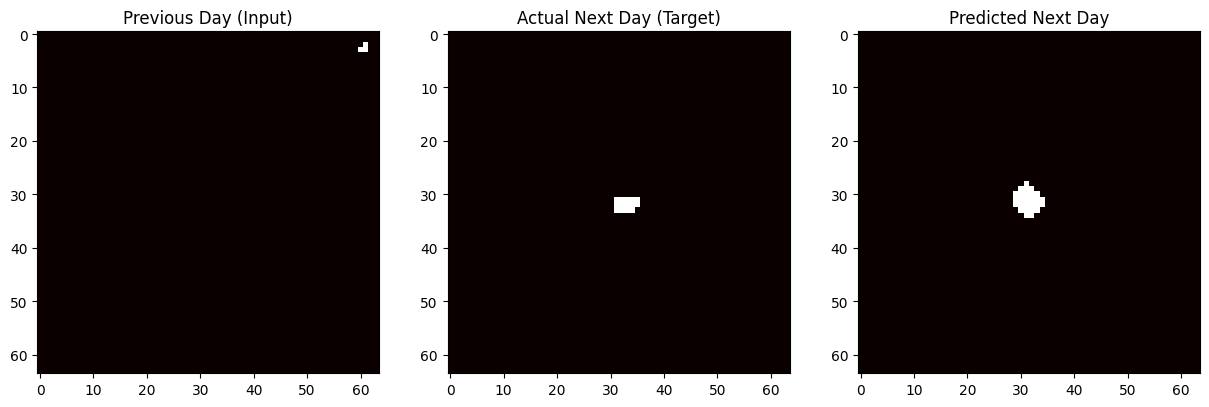

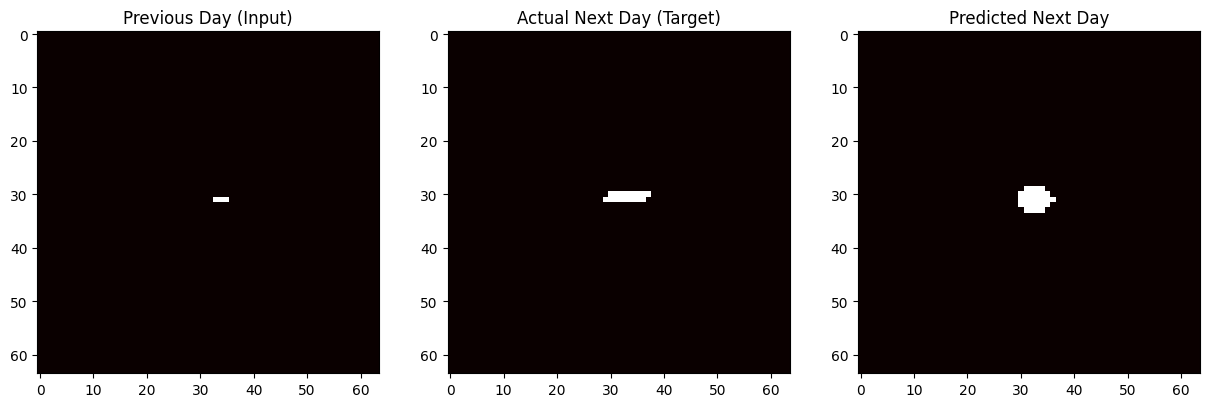

In [11]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from datasets import WildfireDataset
from leejunhyun_unet_models import U_Net

# === CONFIGURATION ===
# Check your 'savedModels' folder in the file browser!
# Update this filename if it is different.
MODEL_PATH = '/content/savedModels/model-U_Net-bestF1Score-Rank-0.weights'

# Paths
DATASET_PATH = 'data/next-day-wildfire-spread'
TEST_DATA_PATH = f"{DATASET_PATH}/test.data"
TEST_LABELS_PATH = f"{DATASET_PATH}/test.labels"
FEATURE_INDICES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # 1. Load Dataset
    print("Loading Test Dataset...")
    if not os.path.exists(TEST_DATA_PATH):
        print("Test data not found! Did the pickle step finish?")
        return

    test_dataset = WildfireDataset(
        TEST_DATA_PATH,
        TEST_LABELS_PATH,
        features=FEATURE_INDICES,
        crop_size=64
    )

    # 2. Check for Model File
    if not os.path.exists(MODEL_PATH):
        print(f"ERROR: Model not found at {MODEL_PATH}")
        print("Available files in savedModels/:")
        print(os.listdir('savedModels'))
        return

    # 3. Load Model
    model = U_Net(12, 1)
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.to(device)
    model.eval()

    # 4. Visualize
    loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

    print("Showing 5 random examples...")
    for i, (img, lbl) in enumerate(loader):
        if i >= 5: break

        img = img.to(device)

        # Predict
        with torch.no_grad():
            pred = torch.sigmoid(model(img))
            pred_mask = (pred > 0.5).float()

        # Prepare for Plotting
        prev_fire = img.cpu().numpy()[0, 11] # Channel 11: Previous Fire
        true_fire = lbl.cpu().numpy()[0, 0]
        pred_fire = pred_mask.cpu().numpy()[0, 0]

        # Plot
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        ax[0].imshow(prev_fire, cmap='hot', vmin=0, vmax=1)
        ax[0].set_title("Previous Day (Input)")

        ax[1].imshow(true_fire, cmap='hot', vmin=0, vmax=1)
        ax[1].set_title("Actual Next Day (Target)")

        ax[2].imshow(pred_fire, cmap='hot', vmin=0, vmax=1)
        ax[2].set_title("Predicted Next Day")

        plt.show()

if __name__ == "__main__":
    main()

In [12]:
!python train_attention.py --epochs 10 --gpus 1

TRAINING Attention U-Net on: fa4ac4ec9382, Starting at: 2025-12-15 17:45:20.558913
data size: 2944991232
label size: 245415936
crop_map size: 239664
good_indices size: 84048
total size: 3190730880
finished initializing RotatedWildfireDataset
data size: 369033216
label size: 30752768
crop_map size: 30032
good_indices size: 10720
total size: 399826736
finished initializing WildfireDataset
Epoch [1/10] Step [0/657] Loss: 1.0519
Epoch [1/10] Step [50/657] Loss: 0.1792
Epoch [1/10] Step [100/657] Loss: 0.1346
Epoch [1/10] Step [150/657] Loss: 0.1224
Epoch [1/10] Step [200/657] Loss: 0.1456
Epoch [1/10] Step [250/657] Loss: 0.1174
Epoch [1/10] Step [300/657] Loss: 0.1014
Epoch [1/10] Step [350/657] Loss: 0.1077
Epoch [1/10] Step [400/657] Loss: 0.0935
Epoch [1/10] Step [450/657] Loss: 0.0925
Epoch [1/10] Step [500/657] Loss: 0.1205
Epoch [1/10] Step [550/657] Loss: 0.0821
Epoch [1/10] Step [600/657] Loss: 0.1391
Epoch [1/10] Step [650/657] Loss: 0.1219
Validation Epoch 1 - Loss: 0.1919, F1: 

In [15]:
# !python explain_model.py

data size: 332070912
label size: 27672576
crop_map size: 27024
good_indices size: 8896
total size: 359779408
finished initializing WildfireDataset
Generating Explainability Maps (Grad-CAM)...
Figure(1200x400)
Figure(1200x400)
Figure(1200x400)


data size: 332070912
label size: 27672576
crop_map size: 27024
good_indices size: 8896
total size: 359779408
finished initializing WildfireDataset
Generating Explainability Maps (Grad-CAM)...


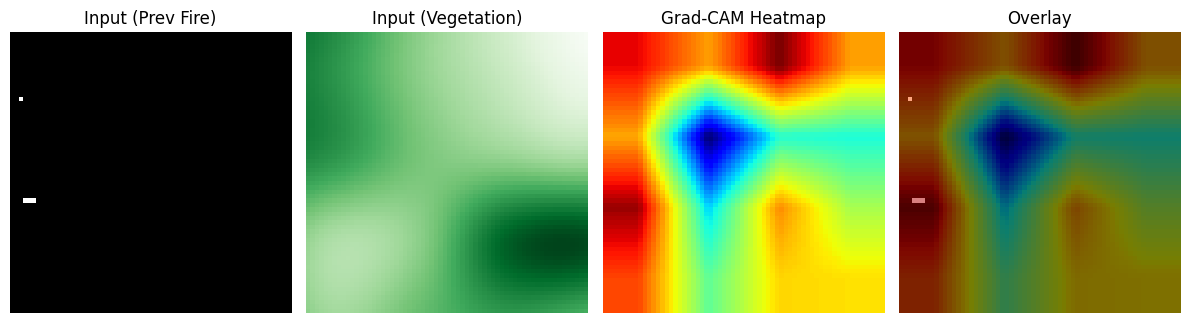

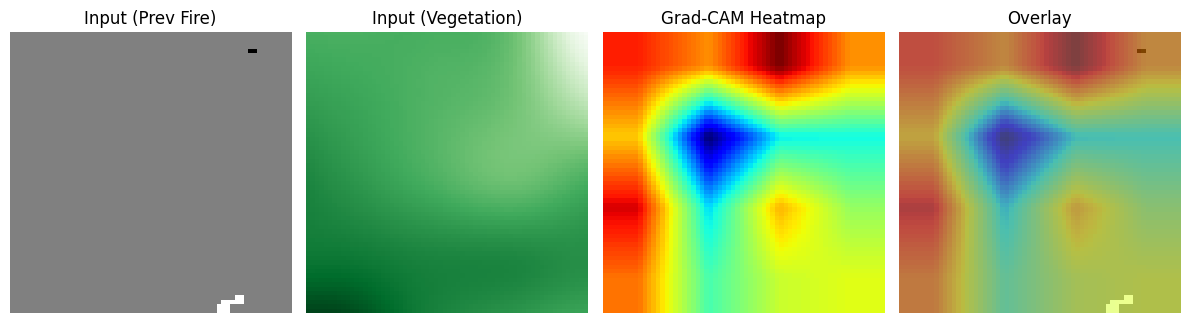

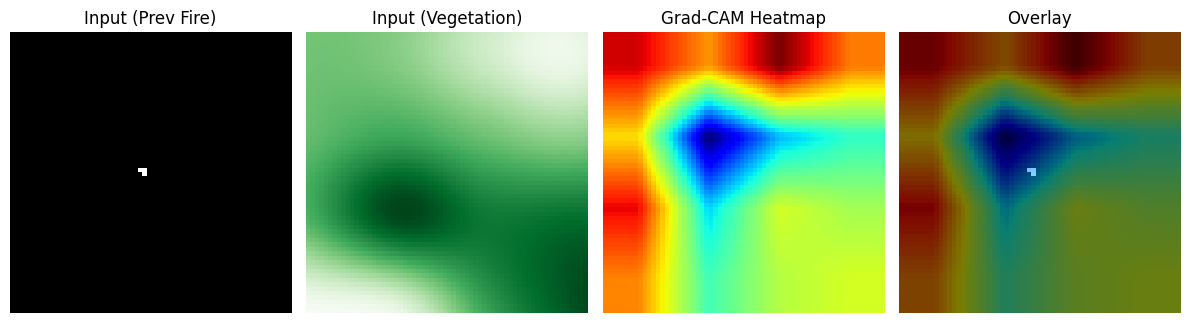

In [17]:

import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from datasets import WildfireDataset
from leejunhyun_unet_models import U_Net  # or AttU_Net if you want to use that

# === CONFIGURATION ===
# Load your TRAINED model here
MODEL_PATH = 'savedModels/model-U_Net-bestF1Score-Rank-0.weights'
DATA_PATH = 'data/next-day-wildfire-spread/test.data'
LABEL_PATH = 'data/next-day-wildfire-spread/test.labels'

def load_model():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = U_Net(12, 1)
    if os.path.exists(MODEL_PATH):
        model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    else:
        print("Warning: Model path not found, using random weights.")
    model.to(device)
    model.eval()
    return model, device

# Simple Grad-CAM implementation for U-Net
# Target: The last convolutional layer of the ENCODER or the BOTTLENECK is usually best for "What input features matter?"
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

        # Hook for gradients
        target_layer.register_full_backward_hook(self.save_gradient)

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def __call__(self, x):
        self.gradients = None

        # Forward pass
        # We need to capture the feature map of the target layer during forward
        # A simple hook or just accessing if the model supports it.
        # Since U_Net doesn't store intermediate outputs in `self`, we need a forward hook too.
        activation = []
        def save_activation(module, input, output):
            activation.append(output)

        handle = self.target_layer.register_forward_hook(save_activation)

        output = self.model(x)
        output = torch.sigmoid(output)

        # Target: maximize the sum of pixels predicted as fire
        score = output.sum()

        # Backward pass
        self.model.zero_grad()
        score.backward()

        handle.remove()

        # Geberate Heatmap
        # gradients: [batch, channels, h, w]
        # activations: [batch, channels, h, w]
        grads = self.gradients
        activations = activation[0]

        # Global Average Pooling of Gradients to get weights
        weights = torch.mean(grads, dim=(2, 3), keepdim=True)

        # Weighted combination
        cam = torch.sum(weights * activations, dim=1, keepdim=True)

        # ReLU
        cam = torch.nn.functional.relu(cam)

        # Normalize
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-7)

        return cam.data.cpu().numpy()[0, 0]

def main():
    if not os.path.exists(DATA_PATH):
        print("Test data not found.")
        return

    model, device = load_model()

    # Target Layer: Let's pick 'd5' (Bottleneck/Deepest layer) or 'Conv5' of encoder
    # In leejunhyun_unet_models.py, U_Net has self.Conv5
    # Let's inspect self.Conv5.conv (Sequential) -> last ReLU/Conv

    # FIX: Disable inplace operations for the target layer to avoid RuntimeError with hooks
    model.Conv5.conv[2].inplace = False # First ReLU
    model.Conv5.conv[5].inplace = False # Second ReLU

    target_layer = model.Conv5.conv[4] # The last BatchNorm/ReLU of the block

    grad_cam = GradCAM(model, target_layer)

    dataset = WildfireDataset(DATA_PATH, LABEL_PATH, features=list(range(12)), crop_size=64)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

    # Process 3 samples
    print("Generating Explainability Maps (Grad-CAM)...")

    for i, (img, lbl) in enumerate(loader):
        if i >= 3: break

        img = img.to(device).requires_grad_(True)

        # Run Grad-CAM
        mask = grad_cam(img)

        # Resize mask to 64x64 if it's smaller (bottleneck is usually smaller, e.g. 4x4 or 8x8)
        mask = cv2.resize(mask, (64, 64))

        # Visualization
        img_cpu = img.detach().cpu().numpy()[0]

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 4, 1)
        plt.title("Input (Prev Fire)")
        plt.imshow(img_cpu[11], cmap='gray') # Prev Fire Mask
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.title("Input (Vegetation)")
        plt.imshow(img_cpu[10], cmap='Greens') # NDVI
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.title("Grad-CAM Heatmap")
        plt.imshow(mask, cmap='jet')
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.title("Overlay")
        plt.imshow(img_cpu[11], cmap='gray')
        plt.imshow(mask, cmap='jet', alpha=0.5)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()


In [16]:
!python damage_assessment.py

data size: 332070912
label size: 27672576
crop_map size: 27024
good_indices size: 8896
total size: 359779408
finished initializing WildfireDataset
=== DAMAGE IMPACT ANALYSIS ===

=== SUMMARY REPORT ===
Analyzed 100.0 regions.
High Risk Scenarios Identified: 0
Total Cumulative Population Risk Score: 0.00


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Create a folder in your Drive
!mkdir -p /content/drive/MyDrive/Wildfire_Project
# Copy everything there
!cp -r * /content/drive/MyDrive/Wildfire_Project/

cp: cannot create directory '/content/drive/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.Encrypted/MyDrive/Wildfire_Project/drive/.

In [20]:
# Create the destination folder
!mkdir -p /content/drive/MyDrive/Wildfire_Project

# 1. Copy the Source Code (.py files)
!cp *.py /content/drive/MyDrive/Wildfire_Project/

# 2. Copy the Notebook itself (if it's saved in the root as .ipynb)
# Note: You might need to save it first via File > Save a copy in Drive
# checking mostly current directory for ipynb files
!cp *.ipynb /content/drive/MyDrive/Wildfire_Project/

# 3. Copy the Saved Models (The important part!)
!cp -r savedModels /content/drive/MyDrive/Wildfire_Project/

# 4. Copy the processed small data (optional, the .data/.labels files)
# If you want to avoid re-processing later
!cp -r data /content/drive/MyDrive/Wildfire_Project/

print("Files successfully backed up to Google Drive!")

cp: cannot stat '*.ipynb': No such file or directory
Files successfully backed up to Google Drive!
